**La liga analysis**

Import libraries that we need

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sqlite3

Then we import the data from sqlite3

Open a connection to the SQLite database file. 

In [4]:
db_file_path = "C:/Users/Albert Espiell/Desktop/Master MScEg/R&I/la-quiniela/laliga.sqlite"
connection = sqlite3.connect(db_file_path)
cursor = connection.cursor()

Execute SQL queries to interact with the database

In [5]:
cursor.execute("SELECT * FROM Matches")
data = cursor.fetchall()

Here we can inspect the data. We want a data frame, so we convert it. 

In [6]:
columns = ["season","division", "matchday", "date", "time", "home_team", "away_team", "score"]
df = pd.DataFrame(data, columns=columns)

df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


a) Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or there’s a tie) of all matches in the data. Write in the plot the percentage o each category

C:\Users\Albert Espiell\AppData\Local\Temp\ipykernel_8524\2353601432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['home_score', 'away_score']] = df['score'].str.split(':', expand=True)
C:\Users\Albert Espiell\AppData\Local\Temp\ipykernel_8524\2353601432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['home_score', 'away_score']] = df['score'].str.split(':', expand=True)
C:\Users\Albert Espiell\AppData\Local\Temp\ipykernel_8524\2353601432.py:5: SettingWithCopyWarning: 
A value is trying to

TypeError: object of type 'bool' has no len()

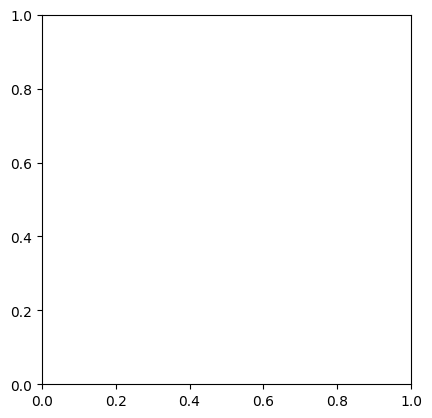

In [7]:
df = df.dropna()

df[['home_score', 'away_score']] = df['score'].str.split(':', expand=True)
#Create a new variable called with the match result, using np.where function
df['result'] = np.where(df['home_score'] > df['away_score'], 'Home Win',
                        np.where(df['home_score'] < df['away_score'], 'Away Win', 'Draw'))

#Cont the number of times every result apears
counts = df['result'].value_counts()

plt.pie(counts, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Match Results')
plt.show()

b) What are the top ten scoring teams of all time? What are the ten teams 
that concede the most? Make two bar plot charts showing each of them.
Consider only matches played in 1st divisio .
What have been the biggest wins? Of course, when we say bigg,est we m an
those with the highest goal difference. Show the top ten of them in a table.

KeyError: 'home_team'